# Decision Trees

#### Instructions:
- Write modular code with relevant docstrings and comments for you to be able to use
functions you have implemented in future assignments.
- All theory questions and observations must be written in a markdown cell of your jupyter notebook.You can alsoadd necessary images in `imgs/` and then include it in markdown. Any other submission method for theoretical question won't be entertained.
- Start the assignment early, push your code regularly and enjoy learning!

### Question 1 Optimal DT from table
**[20 points]**\
We will use the dataset below to learn a decision tree which predicts if people pass machine
learning (Yes or No), based on their previous GPA (High, Medium, or Low) and whether or
not they studied. 

| GPA | Studied | Passed |
|:---:|:-------:|:------:|
|  L  |    F    |    F   |
|  L  |    T    |    T   |
|  M  |    F    |    F   |
|  M  |    T    |    T   |
|  H  |    F    |    T   |
|  H  |    T    |    T   |
    
 For this problem, you can write your answers using $log_2$
, but it may be helpful to note
that $log_2 3 ≈ 1.6$.

---
1. What is the entropy H(Passed)?
2. What is the entropy H(Passed | GPA)?
3. What is the entropy H(Passed | Studied)?
4. Draw the full decision tree that would be learned for this dataset. You do
not need to show any calculations.
---


Answers
1. H(passed) = 0.92
2. H(passed | GPA)= 0.66
3. H(passed | Studied) = 0.46


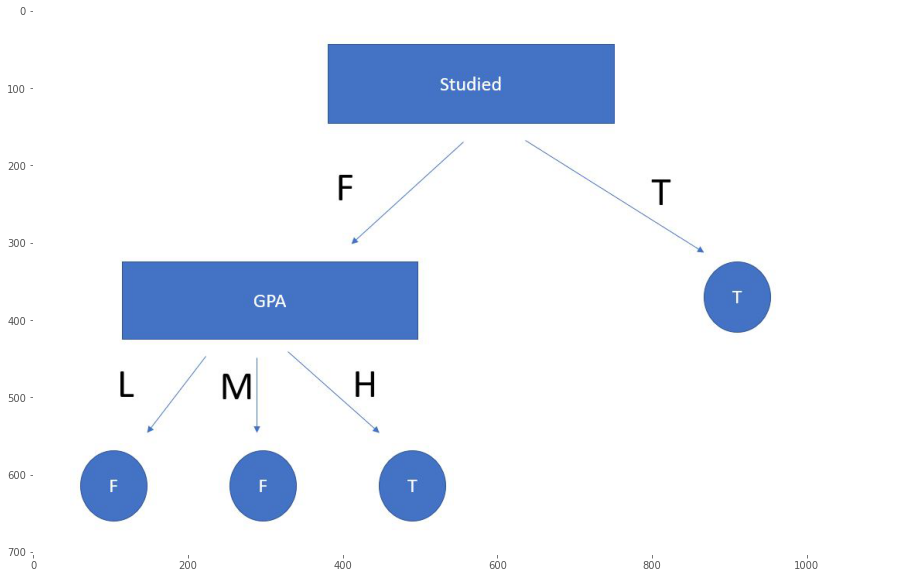

In [ ]:
#full decision tree
import imageio as iio
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

# displaying an image
img = Image.open('/content/drive/MyDrive/Colab Notebooks/DT.JPG') 
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.grid(None)

### Question 2 DT loss functions
**[10 points]**
1. Explain Gini impurity and Entropy. 
2. What are the min and max values for both Gini impurity and Entropy
3. Plot the Gini impurity and Entropy for $p\in[0,1]$.
4. Multiply Gini impurity by a factor of 2 and overlay it over entropy.

Answers

1.The Gini impurity measure is one of the methods used in decision tree algorithms to decide the optimal split from a root node, and subsequent splits. It is the most popular and the easiest way to split a decision tree and it works only with categorical targets as it only does binary splits.

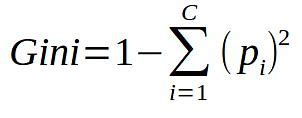



Lower the Gini Impurity, higher is the homogeneity of the node. The Gini Impurity of a pure node is zero.




2.

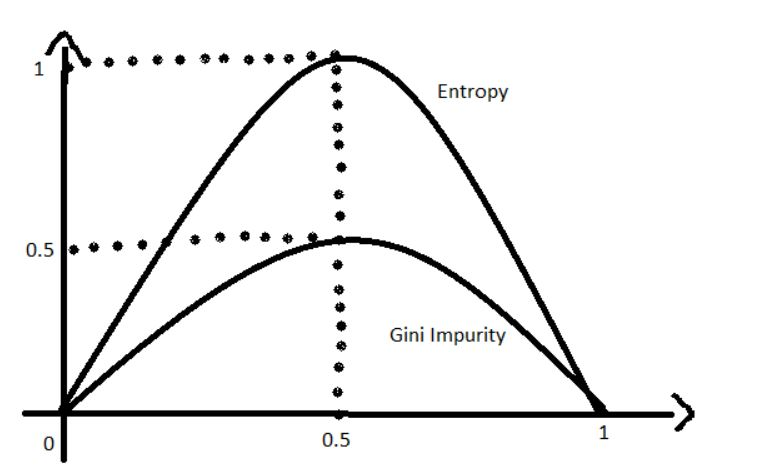

As you can see in the graph for entropy, it first increases up to 1 and then starts decreasing, but in the case of Gini impurity it only goes up to 0.5 and then it starts decreasing, hence it requires less computational power. The range of Entropy lies in between 0 to 1 and the range of Gini Impurity lies in between 0 to 0.5.

Gini impurity:
min value = 0,
max value = 0.5

Entropy:
min value = 0,
max value = 1


In [1]:
#Calculating gini impurity
def gini(a,b):
    a1 = (a/(a+b))**2
    b1 = (b/(a+b))**2
    return 1 - (a1 + b1)

In [2]:
#Calculating entropy
import math
def entropy(base,a,b):
    try:
        var =  abs(((a)/(a+b)) * math.log(((a)/(a+b)),base)) - (((b)/(a+b)) * math.log(((b)/(a+b)),base))
        return var
    except (ValueError):
        return 0

In [3]:
#Imports
import random
import pandas as pd
import matplotlib.pyplot as plt

#Empty lists for storing entropy and gini impurity values
gini_list = []
blue_list = []
red_list = []
blue_prob_list = []
ent_list=[]


for x in range (10000):
  blue = random.uniform(0, 1)
  red = abs(1-blue)
  a = gini(red,blue)
  b = blue/(blue+red)
  c = entropy(2,red,blue)
  ent_list.append(c)
  gini_list.append(a)
  blue_list.append(blue)
  red_list.append(red)
  blue_prob_list.append(b)



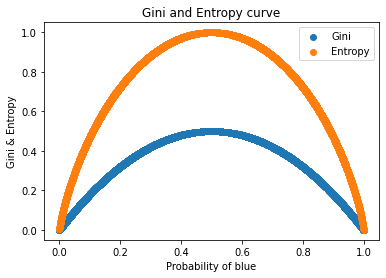

In [6]:
#Plotting gini impurity and entropy curve on same graph
plt.scatter(blue_prob_list,gini_list,label='Gini')
plt.scatter(blue_prob_list,ent_list,label='Entropy')
plt.xlabel('Probability of blue')
plt.ylabel('Gini & Entropy')
plt.title('Gini and Entropy curve')
plt.legend()

Text(0.5, 1.0, 'Gini and entropy Curve')

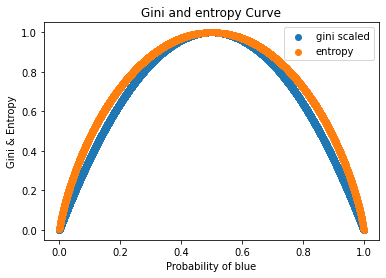

In [7]:
#multiply gini impurity by a factor of 2
scale_gini_list=pd.Series(gini_list)
scale_gini_list=scale_gini_list*2
scale_gini_list=scale_gini_list.tolist()

plt.scatter(blue_prob_list,scale_gini_list, label='gini scaled')
plt.scatter(blue_prob_list,ent_list,label='entropy')
plt.xlabel('Probability of blue')
plt.ylabel('Gini & Entropy')
plt.legend()
plt.title('Gini and entropy Curve')

### Question 3 Training a Decision Tree  
**[40 points]**

You can download the spam dataset from the link given below. This dataset contains feature vectors and the lables of Spam/Non-Spam mails. 
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

**NOTE: The last column in each row represents whether the mail is spam or non spam**\
Although not needed, incase you want to know what the individual columns in the feature vector means, you can read it in the documentation given below.
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.DOCUMENTATION

**Download the data and load it from the code given below**

In [8]:
import numpy as np
import pandas  as pd
from google.colab import drive
drive.mount('/content/drive')

#loading data
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spambase.data',header=None)



Mounted at /content/drive


You can try to normalize each column (feature) separately with wither one of the following ideas. **Do not normalize labels**.
- Shift-and-scale normalization: substract the minimum, then divide by new maximum. Now all values are between 0-1
- Zero mean, unit variance : substract the mean, divide by the appropriate value to get variance=1.

In [9]:
#normalizing function
def norm(x):
  min=x.min()
  for i in range(len(x)):
      x[i]=(x[i]-min)
  max=x.max()
  for i in range(len(x)):
      x[i]=x[i]/max
  return x  
  

In [66]:
#Normalized data
data_norm=data
for name,values in data_norm.iloc[:,:-1].iteritems():
  data_norm[name]=norm(data_norm[name])

display(data_norm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.000000,0.044818,0.125490,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.023955,0.000000,0.000000,0.002502,0,0,1
1,0.046256,0.019608,0.098039,0.0,0.014,0.047619,0.028886,0.006301,0.000000,0.051705,...,0.000000,0.013536,0.0,0.011454,0.029985,0.002421,0.003735,0,0,1
2,0.013216,0.000000,0.139216,0.0,0.123,0.032313,0.026135,0.010801,0.121673,0.013751,...,0.002281,0.014664,0.0,0.008498,0.030651,0.000504,0.008008,0,0,1
3,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.014048,0.0,0.004218,0.000000,0.000000,0.002303,0,0,1
4,0.000000,0.000000,0.000000,0.0,0.063,0.000000,0.042641,0.056706,0.058935,0.034653,...,0.000000,0.013843,0.0,0.004157,0.000000,0.000000,0.002303,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.068282,0.000000,0.121569,0.0,0.000,0.052721,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.023790,0.0,0.000000,0.000000,0.000000,0.000129,0,0,0
4597,0.000000,0.000000,0.000000,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.010869,0.000000,0.000000,0.000504,0,0,0
4598,0.066079,0.000000,0.058824,0.0,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.023261,0.073626,0.0,0.000000,0.000000,0.000000,0.000367,0,0,0
4599,0.211454,0.000000,0.000000,0.0,0.032,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.005845,0.0,0.000000,0.000000,0.000000,0.000133,0,0,0


1. Split your data into train 80% and test dataset 20% 
2. **[BONUS]** Visualize the data using PCA . You can reduce the dimension of the data if you want. Bonus marks if this increases your accuracy.

*NOTE: If you are applying PCA or any other type of dimensionality reduction, do it before splitting the dataset*

57


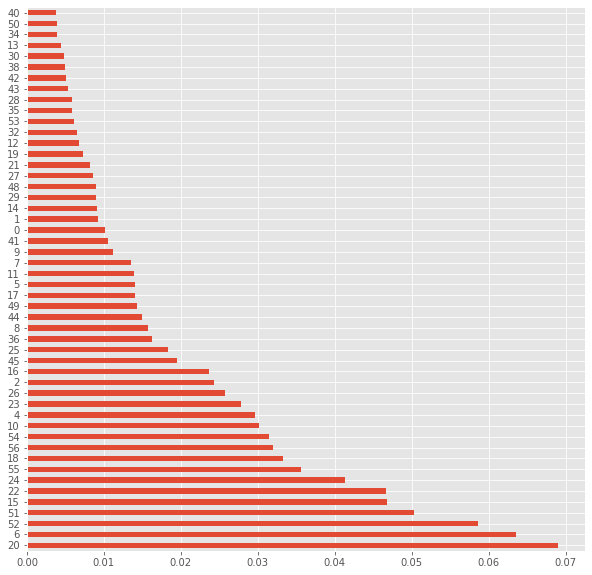


Accuracy with all features:  90.55374592833876
Accuracy with reduced features  and increased accuracy: 91.10%


In [52]:
#drop a few columns and increase the DT accuracy
#For some cases the accuracy is increasing.
#So, run the code for 2-3 times you can see the increased accuracy for reduced features

import numpy as np
import pandas  as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_predict,cross_validate



#Loading the dataset
from sklearn.metrics import accuracy_score
x = data.iloc[:,:-1]
y = data.iloc[:,-1]


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=None)

# classify using random forest classifier With all features
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# print the accuracy 
acc=accuracy_score(y_test, y_pred)


#Loading the dataset
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spambase.data',header=None)
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

model = ExtraTreesClassifier()
model.fit(x,y)

plt.style.use('ggplot')
plt.figure(figsize=(10,10))
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances_sort=feat_importances.sort_values(ascending=False)
# print(feat_importances_sort)
index=feat_importances_sort.index
print(len(index))
# print(feat_importances_sort.iloc[:13])
feat_importances.nlargest(50).plot(kind='barh')
plt.show()


# Select first 13 features from the plot which has high variance
# Features = [6,20,51,52,15,55,22,18,24,56,54,26,4]
Features = index[:25]  
x = data[Features]
y = data.iloc[:,-1]

# Train Test split
train_x, test_x,train_y,test_y = train_test_split(x,y, test_size=0.2, random_state=42)

# classify using random forest classifier With selected features
DT = DecisionTreeClassifier()

# Fitting the values fo X and Y
DT.fit(train_x, train_y)

#Predicting the test values with Model
prediction =  DT.predict(test_x)

#calculating the accuracy
accuracy_score = accuracy_score(test_y,prediction)
print('\nAccuracy with all features: ' , str(acc*100))
print("Accuracy with reduced features  and increased accuracy: %.2f%%" % (accuracy_score * 100.0))



You need to perform a K fold validation on this and report the average training error over all the k validations. 
- For this , you need to split the training data into k splits.
- For each split, train a decision tree model and report the training , validation and test scores.
- Report the scores in a tabular form for each validation

In [53]:
# K fold validation
from tabulate import tabulate
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
 
#Loading the dataset
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
 
print(type(X),type(y))
#Implementing cross validation
k=5
kf = KFold(n_splits=5, random_state=None)
model = DecisionTreeClassifier()



#use k-fold CV to evaluate model
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error',
                         cv=kf, n_jobs=-1)

print("average training error over all the k validations: {}".format(np.mean(np.absolute(scores))))
 
acc_score = []
temp=0 
for train_index , test_index in kf.split(X):
    X_train , X_test = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train , y_test = y[train_index] , y[test_index]
     
    model.fit(X_train,y_train)
    pred_values = model.predict(X_test)
     
    acc = accuracy_score(pred_values , y_test)
    temp+=1
    acc_score.append([temp,acc])

print("\nscores in a tabular form for each validation")
print(tabulate(acc_score,headers=['validation no','score'],tablefmt='grid'))


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
average training error over all the k validations: 0.17495444460180334

scores in a tabular form for each validation
+-----------------+----------+
|   validation no |    score |
+=================+==========+
|               1 | 0.795874 |
+-----------------+----------+
|               2 | 0.798913 |
+-----------------+----------+
|               3 | 0.919565 |
+-----------------+----------+
|               4 | 0.901087 |
+-----------------+----------+
|               5 | 0.7      |
+-----------------+----------+


### Question 4 Random Forest Algorithm
**[30 points]**

1. What is boosting, bagging and  stacking?
Which class does random forests belong to and why? **[5 points]**

Answer

Bagging: 

It is a way to decrease the variance of your prediction by generating additional data for training from your original dataset using combinations with repetitions to produce multisets of the same cardinality/size as your original data. By increasing the size of your training set you can't improve the model predictive force, but just decrease the variance, narrowly tuning the prediction to expected outcome.

Boosting:

is a two-step approach, where one first uses subsets of the original data to produce a series of averagely performing models and then "boosts" their performance by combining them together using a particular cost function (=majority vote). Unlike bagging, in the classical boosting the subset creation is not random and depends upon the performance of the previous models: every new subsets contains the elements that were (likely to be) misclassified by previous models.

Stacking:

 is a similar to boosting: you also apply several models to your original data. The difference here is, however, that you don't have just an empirical formula for your weight function, rather you introduce a meta-level and use another model/approach to estimate the input together with outputs of every model to estimate the weights or, in other words, to determine what models perform well and what badly given these input data.


Which class does random forests belong to and why?

The random forest approach is a bagging method. It consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction 

2. Implement random forest algorithm using different decision trees. **[25 points]** 

In [65]:
#Implement random forest algorithm using different decision trees. 
from collections import Counter
from sklearn.metrics import accuracy_score

import numpy as np

from sklearn.tree import DecisionTreeClassifier


def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs],y[idxs]


def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common


class RandomForest:
    def __init__(self, n_trees=10, min_samples_split=2, max_depth=100, n_feats=None):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for i in range(self.n_trees):
            tree =DecisionTreeClassifier(
                min_samples_split=self.min_samples_split,
                max_depth=self.max_depth,
            )
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)
          

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(y_pred)



if __name__ == "__main__":
  
    from sklearn.model_selection import train_test_split

    import numpy as np
    import pandas  as pd
    from google.colab import drive
    drive.mount('/content/drive')

    data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/spambase.data',header=None)

    X = data.iloc[:,:-1]
    y = data.iloc[:,-1:]

    X=X.to_numpy()
    y=y.to_numpy()

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=None
    )

    clf = RandomForest(n_trees=3, max_depth=10)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print("\nAccuracy:", accuracy_score(y_test, y_pred))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Accuracy: 0.9294245385450597
